In [1]:
import os
import cv2
import pandas as pd
from glob import glob

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from time import time

In [2]:
data_dir_path = '/data/examples/may_the_4_be_with_u/where_am_i'
print(os.listdir(data_dir_path))

['img-submission.csv', 'mid_term_mapping.txt', 'testset', 'train']


In [3]:
target_label_file_name = 'mid_term_mapping.txt'
targetlist = pd.read_csv(data_dir_path+"/"+target_label_file_name,names=['class','index'])
targetlist

,class,index
0,CALsuburb,9
1,PARoffice,7
2,bedroom,12
3,coast,10
4,forest,4
5,highway,14
6,industrial,2
7,insidecity,3
8,kitchen,0
9,livingroom,5


In [4]:
maplist=dict(zip(targetlist['class'],targetlist['index']))
maplist

{'CALsuburb': 9,
 'PARoffice': 7,
 'bedroom': 12,
 'coast': 10,
 'forest': 4,
 'highway': 14,
 'industrial': 2,
 'insidecity': 3,
 'kitchen': 0,
 'livingroom': 5,
 'mountain': 8,
 'opencountry': 6,
 'store': 11,
 'street': 1,
 'tallbuilding': 13}

In [5]:
train_path = data_dir_path + '/train/'
train_dir = list(os.listdir(train_path))

In [6]:
file_key = []
file_name = []
for i,n in enumerate(train_dir):
    ff = glob(train_path+n+"/*.jpg")
    for f in ff:
        file_key.append(maplist[n])
        file_name.append(f)
data_list = pd.DataFrame({'class': file_key, 'path': file_name}) #把資料的連結存入list內，可以快速使用
data_list.head()

,class,path
0,9,/data/examples/may_the_4_be_with_u/where_am_i/...
1,9,/data/examples/may_the_4_be_with_u/where_am_i/...
2,9,/data/examples/may_the_4_be_with_u/where_am_i/...
3,9,/data/examples/may_the_4_be_with_u/where_am_i/...
4,9,/data/examples/may_the_4_be_with_u/where_am_i/...


## Shuffle and split the list into training set and validation set

In [7]:
# 將資料清單隨機打亂
rand_seed = int(time())
data_list = shuffle(data_list, random_state=rand_seed)
data_list.head(10)

,class,path
17,9,/data/examples/may_the_4_be_with_u/where_am_i/...
155,7,/data/examples/may_the_4_be_with_u/where_am_i/...
966,14,/data/examples/may_the_4_be_with_u/where_am_i/...
2235,6,/data/examples/may_the_4_be_with_u/where_am_i/...
955,14,/data/examples/may_the_4_be_with_u/where_am_i/...
1703,5,/data/examples/may_the_4_be_with_u/where_am_i/...
2635,1,/data/examples/may_the_4_be_with_u/where_am_i/...
2764,13,/data/examples/may_the_4_be_with_u/where_am_i/...
475,10,/data/examples/may_the_4_be_with_u/where_am_i/...
1677,5,/data/examples/may_the_4_be_with_u/where_am_i/...


In [8]:
#切割資料
train_size = 0.9
df_train, df_valid = data_list[:int(len(data_list)*train_size)], data_list[int(len(data_list)*train_size):]
# print(int(len(data_list)*train_size) )
print(df_train.shape)
print(df_valid.shape)
print(data_list.shape)


(2686, 2)
(299, 2)
(2985, 2)


In [9]:
mydir = 'data_tmp' #copy到自己資料夾的母資料夾名稱
train_dir = mydir + '/train/' # 等等要將資料copy到自己的訓練資料夾
valid_dir = mydir + '/valid/' # 等等要將資料copy到自己的驗證資料夾

if not os.path.isdir(os.getcwd()+'/'+mydir) :
    try: 
        os.mkdir(mydir)
        os.mkdir(train_dir)
        os.mkdir(valid_dir)
    except: 
        print("create dir %s fail",mydir)


In [10]:
from shutil import copyfile

# df_train.path[0].split("/")[-1] # filename
def newPath(oldPath):
    return oldPath.split("/")[-2] + '/' + oldPath.split("/")[-1]

df_train['newPath']= df_train.apply(lambda row: train_dir + newPath(row['path']) ,axis=1)
df_valid['newPath']= df_valid.apply(lambda row: valid_dir + newPath(row['path']) ,axis=1)

# copyfile(src, dst)
# for i in range(len(df_train)):
#     copyfile(df_train.path[i], train_dir + "train_" + df_train.path[i].split("/")[-1] + ".jpg")
#     print(x_train.path.index(i))
#     print(df_train.path[i])
# for i in range(len(x_valid)):
#     copyfile(x_valid.path[i], valid_dir + "valid_" + str(i) + ".jpg")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
def copyfileToDir(oldPath,newPath):
    try:
        copyfile(oldPath,newPath)
    except:
        try:
            if not os.path.exists('/'.join(newPath.split('/')[:-1])):
                os.makedirs('/'.join(newPath.split('/')[:-1]))
                copyfile(oldPath,newPath)
        except:
            print("mkdir error!")
    
## copy file to my dir 
## ------------- 只做一次 ，需要複製的時候再把以下註解解開 ------------- ##

# df_train.apply(lambda row: copyfileToDir(row['path'] , row['newPath']) ,axis=1)
# df_valid.apply(lambda row: copyfileToDir(row['path'] , row['newPath']) ,axis=1)

## ------------- 只做一次 ，需要複製的時候再把以上註解解開 ------------- ##


### TEST


## Data augmentation

In [12]:
img_height, img_width = 256,256
batch_size = 30

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=30, 
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')


Using TensorFlow backend.


Found 2686 images belonging to 15 classes.
Found 299 images belonging to 15 classes.


In [14]:
train_generator.class_indices

{'CALsuburb': 0,
 'PARoffice': 1,
 'bedroom': 2,
 'coast': 3,
 'forest': 4,
 'highway': 5,
 'industrial': 6,
 'insidecity': 7,
 'kitchen': 8,
 'livingroom': 9,
 'mountain': 10,
 'opencountry': 11,
 'store': 12,
 'street': 13,
 'tallbuilding': 14}

### Transfer Learning

In [15]:
fc1_hidden = 512
fc2_hidden = 256
fc3_hidden = 128
num_class = 15
lr = 0.001
momentum=0.9
epoch = 30

In [16]:
import keras
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

VGG16_base = keras.applications.VGG16(weights='imagenet', include_top=False)

x = VGG16_base.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(fc1_hidden,activation='relu')(x)
x = keras.layers.Dense(fc2_hidden,activation='relu')(x)
x = keras.layers.Dense(fc3_hidden,activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)

VGG16_transfer = Model(inputs=VGG16_base.input, outputs=predictions)

VGG16_transfer.compile(loss = 'categorical_crossentropy',
                       optimizer = keras.optimizers.SGD(lr=lr, momentum=momentum),
                       metrics=['accuracy'])

VGG16_transfer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [17]:
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history_VGG16 = VGG16_transfer.fit_generator(train_generator,
                                             epochs=epoch,
                                             shuffle=True,
                                             verbose=1,
                                             callbacks=[earlystop],
                                             validation_data=valid_generator)

model_path = mydir + '/VGG16_where_am_i.h5'
VGG16_transfer.save(model_path)


Epoch 1/30
90/90 [==============================] - 38s 428ms/step - loss: 2.2163 - acc: 0.2776 - val_loss: 1.7518 - val_acc: 0.4247
Epoch 2/30
90/90 [==============================] - 34s 378ms/step - loss: 1.3724 - acc: 0.5222 - val_loss: 1.1230 - val_acc: 0.5853
Epoch 3/30
90/90 [==============================] - 34s 378ms/step - loss: 1.0649 - acc: 0.6153 - val_loss: 0.9129 - val_acc: 0.6488
Epoch 4/30
90/90 [==============================] - 34s 380ms/step - loss: 0.8689 - acc: 0.6989 - val_loss: 0.7758 - val_acc: 0.7525
Epoch 5/30
90/90 [==============================] - 34s 382ms/step - loss: 0.7905 - acc: 0.7264 - val_loss: 0.6853 - val_acc: 0.7659
Epoch 6/30
90/90 [==============================] - 34s 383ms/step - loss: 0.6402 - acc: 0.7820 - val_loss: 0.5963 - val_acc: 0.7893
Epoch 7/30
90/90 [==============================] - 34s 383ms/step - loss: 0.5843 - acc: 0.7988 - val_loss: 0.5705 - val_acc: 0.7960
Epoch 8/30
90/90 [==============================] - 34s 383ms/step - 

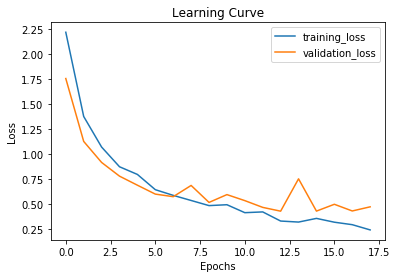

In [18]:
training_loss = history_VGG16.history['loss']
val_loss = history_VGG16.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

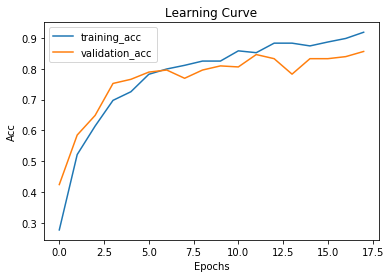

In [19]:
training_acc = history_VGG16.history['acc']
val_acc = history_VGG16.history['val_acc']

plt.plot(training_acc, label="training_acc")
plt.plot(val_acc, label="validation_acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()